### Titanic: Machine Learning from Disaster

Titanic ML Competition is the best known ML problem.  It helps us to get
familiar with both ML and Kaggle.

Here we are given details of passengers like Name, Sex, Age and using those features we have to create
a model that predicts whether this passenger will survive or not.

Details: https://www.kaggle.com/c/titanic

In this notebook, we will

- Introduce, visualize and prepare Titanic ML dataset.
- Build a classification model to predict survival.
- Create a submittable file for kaggle.

#### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read in and Explore the Data


In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
# Have a view at the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# The columns in the dataset are our features.
# Survived: 1 = Survived, 0 = Dead

print(train_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
#see a summary of the training dataset
train_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Some Observations:

- There are a total of 891 passengers in our training set.
- There are some missing values in Age, Cabin and Embarked.

#### Visualization

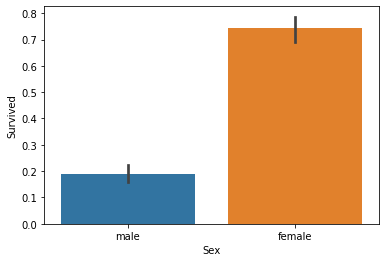

In [6]:
# Survival vs Gender
sns.barplot(x="Sex", y="Survived", data=train_data)

#### We can see that there are way more female survivers than the male.

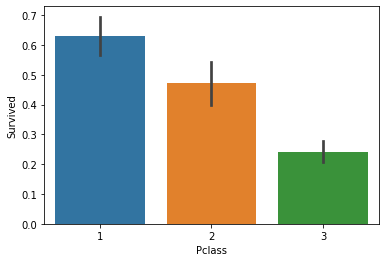

In [7]:
# Survival vs Passenger Class
sns.barplot(x="Pclass", y="Survived", data=train_data)

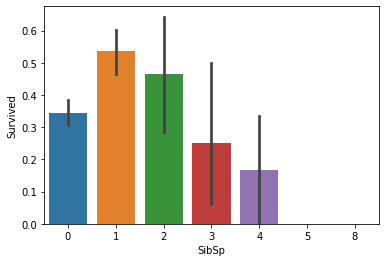

In [8]:
# Survival vs SibSp (Survival vs Sibling/Spouse)
sns.barplot(x="SibSp", y="Survived", data=train_data)


#### Data Cleansing
There are some missing value for Age, Cabin and Embarked.
The cabin feature is not important so we will drop it. But for age and
Embarked we have to fill it with some valid value.

In [9]:
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Sex, Embarked are categorical features. 

As ML models works  with numbers only we have to change these features from
categorical to Numerical

In [10]:
## Dropping unnecessary features
train_data = train_data.drop(columns = ["Ticket", "PassengerId", "Cabin", "Name"])
## Creating a new feature by adding SibSp and Parch
train_data["Family Size"] = train_data["SibSp"] + train_data["Parch"] + 1

## Changing Categorical Features to Numerical
train_data["Sex"] = train_data["Sex"].map({"male":0, "female":1})
train_data["Embarked"] = train_data["Embarked"].map({"C":0, "Q":1, "S":1})

## Filling missing values
train_data["Embarked"] = train_data["Embarked"].fillna(2)
train_data["Age"] = train_data["Age"].fillna(30)

In [11]:
# Check Missing Data Stats
train_data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family Size    0
dtype: int64

The data cleansing task we have done is required for both test and train set.

So let's create a function that would take a dataframe and return a cleaned
dataframe.

In [12]:
def preprocessTitanic(dataset):
    dataset["Family Size"] = dataset["SibSp"] + dataset["Parch"] + 1
    dataset = dataset.drop(columns = ["Ticket", "PassengerId", "Cabin", "Name"])
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})
    dataset["Embarked"] = dataset["Embarked"].map({"C":0, "Q":1, "S":1})
    dataset["Embarked"] = dataset["Embarked"].fillna(2)
    dataset["Age"] = dataset["Age"].fillna(30)
    
    return dataset

## Let's Build a model

In [13]:
train_dataset = pd.read_csv("train.csv", header=0)
test_dataset = pd.read_csv("test.csv", header=0)

## Using preprocessTitanic Function to clean the data.
train_dataset_processed = preprocessTitanic(train_dataset)
test_dataset_processed = preprocessTitanic(test_dataset)

In [14]:
train_dataset_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size
0,0,3,0,22.0,1,0,7.2500,1.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,2
2,1,3,1,26.0,0,0,7.9250,1.0,1
3,1,1,1,35.0,1,0,53.1000,1.0,2
4,0,3,0,35.0,0,0,8.0500,1.0,1


In [15]:
# Store all features at X
X =  train_dataset_processed.values[:, 1:] # The first column is our target label, so it can't be used to predict
X

array([[ 3.    ,  0.    , 22.    , ...,  7.25  ,  1.    ,  2.    ],
       [ 1.    ,  1.    , 38.    , ..., 71.2833,  0.    ,  2.    ],
       [ 3.    ,  1.    , 26.    , ...,  7.925 ,  1.    ,  1.    ],
       ...,
       [ 3.    ,  1.    , 30.    , ..., 23.45  ,  1.    ,  4.    ],
       [ 1.    ,  0.    , 26.    , ..., 30.    ,  0.    ,  1.    ],
       [ 3.    ,  0.    , 32.    , ...,  7.75  ,  1.    ,  1.    ]])

In [16]:
# Store all labels at y
y = train_dataset_processed.values[:, 0]

Now we can use use any classifier to train our model. We can use Neural Network, Logistic Regression ..

Recently many winning solutions in Kaggle are using XGBoost. So it may be a good place to start.
More Info on XGBoost: https://xgboost.readthedocs.io/en/latest/

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Next, we will split our dataset into test set and train set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
# Let's Check Accuracy
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9694915254237289

### Submit to Kaggle


In [21]:
## Now, Let's check the test dataset provided by the kaggle.

X_kaggle_test = test_dataset_processed.values

In [22]:
predictions = model.predict(X_kaggle_test)
submission = pd.concat([test_dataset.PassengerId, pd.DataFrame(predictions)], axis="columns")
submission.columns = ["PassengerID", "Survived"]
submission.Survived = submission.Survived.astype(int)
submission.to_csv("titanic_submission_29sep.csv", header=True, index=False)

This generates a csv file and if we upload this to kaggle it shows a 74% accuracy which is decent.
There are some other way we can increase the accuracy. We have dropped columns like name which could
have some correlation with survival. 

Use https://www.kaggle.com/c/titanic to submit your predictions.